<a href="https://colab.research.google.com/github/aryanrajrcotba/Lung-Cancer-Data-Set-Review-and-Training-Model-/blob/main/Lungcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [4]:
def train_model_on_dataset(dataset_path, dataset_name):
    # Prepare data
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_data = datagen.flow_from_directory(
        dataset_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )

    val_data = datagen.flow_from_directory(
        dataset_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )

    # Simple CNN model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_data, validation_data=val_data, epochs=10)

    # Plot accuracy graph
    plt.figure(figsize=(8,5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Model Accuracy for {dataset_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, history


Found 12040 images belonging to 3 classes.
Found 3009 images belonging to 3 classes.
Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 2417s 6s/step - accuracy: 0.7415 - loss: 0.6681 - val_accuracy: 0.8960 - val_loss: 0.2650
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.9021 - loss: 0.2441 - val_accuracy: 0.9206 - val_loss: 0.1960
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.9537 - loss: 0.1227 - val_accuracy: 0.9295 - val_loss: 0.1736
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.9766 - loss: 0.0692 - val_accuracy: 0.9395 - val_loss: 0.1621
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 448s 1s/step - accuracy: 0.9801 - loss: 0.0562 - val_accuracy: 0.9206 - val_loss: 0.2227
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 445s 1s/step - accuracy: 0.9909 - loss: 0.0298 - val_accuracy: 0.9169 - val_loss: 0.2361
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.9875 - loss: 0.0340 - val_accuracy: 0.9305 - val_loss: 0.2305
Epoch 8/10


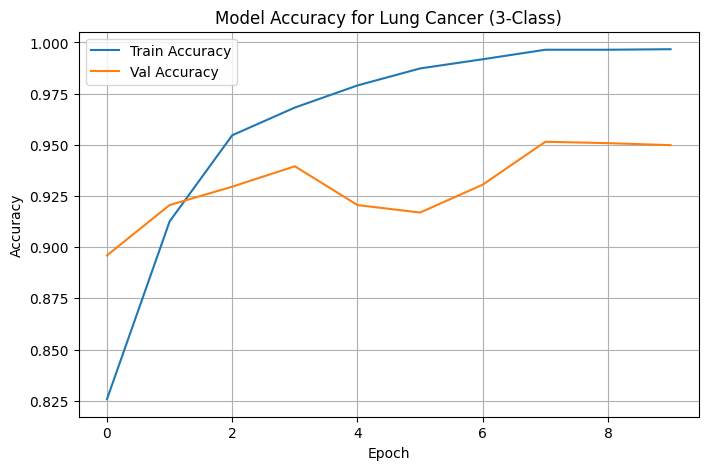

In [9]:
def train_model_on_dataset(dataset_path, dataset_name):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_data = datagen.flow_from_directory(
        dataset_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )

    val_data = datagen.flow_from_directory(
        dataset_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_data, validation_data=val_data, epochs=10)

    # Plot accuracy graph
    plt.figure(figsize=(8,5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Model Accuracy for {dataset_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, history

# Use the unified dataset path
dataset_path = "/content/drive/MyDrive/Lung_Cancer_Data_Set/lung_colon_image_set/lung_image_sets"

model, history = train_model_on_dataset(dataset_path, "Lung Cancer (3-Class)")


In [10]:
model.save(f'{name.replace(" ", "_").lower()}_model.h5')
